Kütüphaneleri import edildi.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image

data sözlüğü oluşturup içine bazı datalar girildi.

In [2]:
data = {'date': ['2018-01-01', '2018-02-01','2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01',
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01'],
'visitors': [35, 30, 82, 26, 83, 46, 40, 57, 95, 57, 87, 42]}

Pandas veri çerçevesine dönüştürdüldü.

In [3]:
df = pd.DataFrame(data,
columns=['date', 'visitors'])

Sütun başlıklarını gösterildi.

In [4]:
df.head()

,date,visitors
0,2018-01-01,35
1,2018-02-01,30
2,2018-03-01,82
3,2018-04-01,26
4,2018-05-01,83


date tiplerini gösterildi.

In [5]:
df.dtypes

date        object
visitors     int64
dtype: object

Date sütunu nesne olarak gösterildiği için değiştirildi.

In [6]:
df['date'] = pd.to_datetime(df['date'])

Bir dizin belirledik ve veri çerçevesini bu dizine göre sıralandı.

In [7]:
df.set_index('date', inplace=True) 
df.sort_index(inplace=True)

Sütun başlıkları gösterildi.

In [8]:
df.head()

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82


2018 yılı ziyaretçilerine bakabiliriz ama kitapta df('2018-05') gibi bir ifade verilmiş ama sürüm farkından dolayı aşağıdaki gibi tanımlandı.

In [9]:
df.loc['2018-05']

,visitors
date,
2018-05-01,83
2018-05-01,87


2018-03-01 tarihinden sonrasını almak için iki nokta üst üste kullanıldı.

In [10]:
df[datetime(2018, 3, 1):]

,visitors
date,
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83
2018-05-01,87
2018-06-01,46
2018-06-01,42


After ifadesini kullanarak o tarihten önceki tarihleri alındı.

In [11]:
df.truncate(after='2018-03-01')

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95


aynı tarihlerin kaç kez tekrarladığını gösterildi.(Count metodu sayesinde)

In [12]:
df.groupby('date').count()

,visitors
date,
2018-01-01,2
2018-02-01,2
2018-03-01,2
2018-04-01,2
2018-05-01,2
2018-06-01,2


Aylık iki girişimiz vardı. 'M' ifadesiyle ayların ortalamasını alındı.

In [13]:
df.resample('M').mean()

,visitors
date,
2018-01-31,37.5
2018-02-28,43.5
2018-03-31,88.5
2018-04-30,41.5
2018-05-31,85.0
2018-06-30,44.0


Ayların toplamı alındı.

In [14]:
df.resample('M').sum()

,visitors
date,
2018-01-31,75
2018-02-28,87
2018-03-31,177
2018-04-30,83
2018-05-31,170
2018-06-30,88


Ziyaretçi grafiğini çıkartıldı.

<AxesSubplot:xlabel='date'>

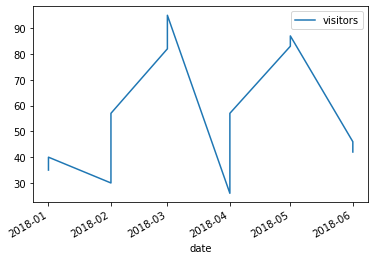

In [15]:
df.plot()

 #### Açıklamalar
- *B* :iş günü frekansı
- *C* :özel iş günü frekansı
- *D* :takvim günü frekansı
- *W* :haftalık frekans
- *M* :ay sonu frekansı
- *SM* :yarı ay sonu frekansı (15. ve ayın sonu)
- *BM* :iş ayı sonu frekansı
- *CBM* :özel iş ay sonu frekansı
- *MS* :ay-başlangıç frekansı
- *SMS* :altı aylık başlangıç frekansı
- *BMS* :iş ayı başlangıç frekansı
- *CBMS* :özel iş ay başlangıç frekansı
- *Q* :çeyrek bitiş frekansı
- *BQ* :iş çeyreği sonu frekansı
- *QS* :çeyrek başlangıç frekansı
- *BQS* :iş çeyreği-başlangıç frekansı
- *A,Y* :yıl sonu frekansı
- *BA,BY* :iş yılı sonu frekansı
- *AS,YS* :yıl başlangıç frekansı
- *BAS,BYS* :iş yılı başlangıç frekansı
- *BH* :iş saati frekansı
- *H* :saatlik frekans
- *T,min* :dakika frekansı
- *S* :saniye frekans
- *L,ms* :milisaniye
- *U,us* :mikrosaniye
- *N* :nanosaniye

Ziyaretçilerin tarihlere göre istatistik verileri gösterildi.

In [16]:
df.groupby('date').describe()

visitors                                                 
              count  mean        std   min    25%   50%    75%   max
date                                                                
2018-01-01      2.0  37.5   3.535534  35.0  36.25  37.5  38.75  40.0
2018-02-01      2.0  43.5  19.091883  30.0  36.75  43.5  50.25  57.0
2018-03-01      2.0  88.5   9.192388  82.0  85.25  88.5  91.75  95.0
2018-04-01      2.0  41.5  21.920310  26.0  33.75  41.5  49.25  57.0
2018-05-01      2.0  85.0   2.828427  83.0  84.00  85.0  86.00  87.0
2018-06-01      2.0  44.0   2.828427  42.0  43.00  44.0  45.00  46.0

string verilen tarihi to_datetime ile aşağıdaki gibi çevrildi.

In [17]:
date=pd.to_datetime("14th of October,2016")
print(date)

2016-10-14 00:00:00


İlgili parametreler verilerek gün ve ay çıktıları alındı.

In [18]:
date.strftime('%A')

'Friday'

In [19]:
date.strftime('%B')

'October'

## 1.3.1 Pandasta Zaman Serileri

range kullanarak verilen iki tarihin aralığı alındı.

In [20]:
pd.date_range('2018-05-30', '2018-06-02')

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

range içinde periods kullanarak verilen tarihle beraber sonra ki 4 tarih alındı.

In [21]:
pd.date_range('2018-05-30', periods=4)

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

freq ile 'M' belirtildiği için ay olarak alındı.

In [22]:
pd.date_range('2018-05-30', periods=4,freq='M')

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'], dtype='datetime64[ns]', freq='M')

Numpy'nin random fonksiyonu import edildi.

In [23]:
from numpy.random import randn
idx =pd.date_range('2018-06-04 00:00:00',
periods=4)
cols =['A','B','C','D']

Rand yardımıyla dört satır ve dört sutun için veri oluşturacağız.

In [24]:
data =randn(len(idx),len(cols))

In [25]:
df =pd.DataFrame(data=data,
index=idx, columns=cols)
df.index.name='date'
print(df)

                   A         B         C         D
date                                              
2018-06-04 -0.013568  1.700910  0.078950 -1.039147
2018-06-05 -0.313357 -0.028170 -0.385214  0.341031
2018-06-06 -1.103062 -0.874382 -0.852661 -1.886447
2018-06-07  0.535338 -1.059704 -0.401335 -0.538689


Yukarıdaki tablo veri özetlemek için kullanışlıdır ancak birçok uygulama uzun format veya erimiş bir veri kümesine sahip olmak ister. Yukarıdaki verileri gösterildiği gibi dikdörtgen yapmak yerine, tüm veri okumalarını tek bir sütunda yapılacak.

Yapmamız gerekin ilk iş dizini sıfırlamak sonrasında veri çerçevesini eritmek, yeni tanımlayıcı değişken olan bir sütun oluşturulur. Son olarak değişken ve değer sütunlarının adları sırasıyla var_name ve value_name olarak belirtilir.

In [26]:
df.reset_index(inplace=True)

In [27]:
melted=pd.melt(df,id_vars='date',
var_name='feature',
value_name='reading')

In [28]:
print(melted)

         date feature   reading
0  2018-06-04       A -0.013568
1  2018-06-05       A -0.313357
2  2018-06-06       A -1.103062
3  2018-06-07       A  0.535338
4  2018-06-04       B  1.700910
5  2018-06-05       B -0.028170
6  2018-06-06       B -0.874382
7  2018-06-07       B -1.059704
8  2018-06-04       C  0.078950
9  2018-06-05       C -0.385214
10 2018-06-06       C -0.852661
11 2018-06-07       C -0.401335
12 2018-06-04       D -1.039147
13 2018-06-05       D  0.341031
14 2018-06-06       D -1.886447
15 2018-06-07       D -0.538689


## 1.3.2 Zaman Serisi Veri Manipülasyonu

Apple Inc veri setini kullanacağız. Veri seti belirtilen adresten indirilir ve import edilir.
Date (Tarih) adlı sütunu datetime olarak ele alınması gerekiyor ve bu dönüşümü yapmak için to_datetime kullanıldı. Format belirtildi.


In [29]:
appl =pd.read_csv('APPL.CSV')
appl.Date =pd.to_datetime(appl.Date,
format='%Y-%m-%d')
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500
1,2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200
2,2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300
3,2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400
4,2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900


Close sütununa odaklanılacak ancak bunu yapmadan önce Date sütunu tarafından sağlananları dizine eklenecek.

In [30]:
appl.set_index('Date', inplace=True)

Artık Close (kapanış) fiyatlarına bakabiliriz.

In [31]:
appl['Close'].head(3)

Date
2017-04-25    144.529999
2017-04-26    143.679993
2017-04-27    143.789993
Name: Close, dtype: float64

Sağlanan veriler otomatik olarak zaten sıralanmıştır ancak dizin verilerinin doğru sırada olmadığına biliyorsak bunu kullanmalıyız:

In [32]:
df.sort_index(inplace=True)

Hesaplama sonucu aşağıdaki gibidir:

In [33]:
appl['pct_change'] =appl.Close.pct_change()

In [34]:
appl['pct_change'].tail(3)

Date
2018-04-23   -0.002896
2018-04-24   -0.013919
2018-04-25    0.004357
Name: pct_change, dtype: float64

t ve sonraki zaman dilimleri arasındaki farkı diff() metodu ile alındı.

In [35]:
appl['log_ret'] =np.log(appl.Close).diff()

Oluşturduğumuz yeni sütundaki değerlere bakarak işlem sonucu aşağıdaki gibidir.

In [36]:
appl['log_ret'].tail(3)

Date
2018-04-23   -0.002901
2018-04-24   -0.014017
2018-04-25    0.004348
Name: log_ret, dtype: float64

SIRADAKİ ÖRNEK BITCOIN/USD exchange rate:
Verileri inceleyecek olursak tarihin time_start adlı sütunda saklandığı ve biçiminin dd-MM-yyyy hh:mm şeklinde olduğunu görülür.

In [37]:
parser =lambda date: pd.datetime.\
strptime(date, '%d/%m/%Y %H:%M')

 Veriler ve tarihler aynı anda ayrışacak. Ayrıştırılacak sütunları ve nasıl ayrıştırıldığını belirtiyoruz. (Versiyon farkından dolayı hata) 

In [38]:
fname ='bitcoin_usd.csv'
bitcoin =pd.read_csv(fname,
parse_dates=['time_start'],
date_parser=parser,
index_col='time_start')

C:\Users\NORA JDK\AppData\Local\Temp\ipykernel_11644\672998254.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser =lambda date: pd.datetime.\


In [39]:
ticks =bitcoin[['close','volume']]

In [40]:
ticks.resample('5Min').first()

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:05:00,413.26,0.035157
2016-03-31 00:10:00,413.51,43.640052
2016-03-31 00:15:00,414.98,0.038896
2016-03-31 00:20:00,414.98,0.241800
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [41]:
ticks.resample('D').last()

,close,volume
time_start,,
2016-03-31,416.02,0.200000
2016-04-01,417.90,52.099684
2016-04-02,420.30,0.850000
2016-04-03,420.60,0.984358



## 1.4 Zaman Serisi Verilerinin Modellenmesi

Pdf'teki beyaz gürültü grafiği gösterildi.

In [42]:
import matplotlib.pyplot as plt

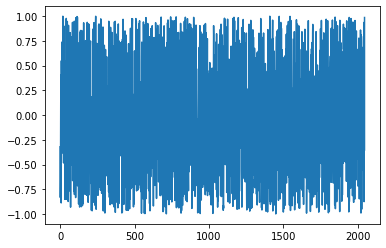

In [43]:
white =2*np.random.random(size=2048)-1
white =pd.Series(white)
plt.plot(white)
plt.show()

Otokorelasyon: Gözlemlenen değerler arasındaki benzerliğin, zamansal gecikmenin bir fonksiyonu olarak ifadesidir.

Otokorelasyon hesaplaması -1 ile 1 arasındadır. Oluşturulan beyaz gürültü için otokorelasyon hesaplayalım.

In [44]:
for lag in range(1,5):
    print("Autocorrelation atlag={0} is {1}".\
        format(lag, white.autocorr(lag)))

Autocorrelation atlag=1 is 0.0010496146184553964
Autocorrelation atlag=2 is 0.045412840608835645
Autocorrelation atlag=3 is -0.028834566898154695
Autocorrelation atlag=4 is 0.016915613146827813


Orta değerin hesaplanması aşağıdaki gibi yapılır.

In [45]:
print(white.mean())

0.0064602943071655206


##  1.4.2 Hareketli Ortalamalar ve Üstel Yumuşatma

Zaman serilerini geçmiş değerlerine dayanarak gecelteki değerini tahmin edebiliriz.

Hareketli Ortalama, veri kümesinin farklı alt kümelerinin bir dizi ortalamasını oluşturarak veri noktalarını analiz etmek için bir hesaplamadır.

Üstel Yumuşatma, verilerdeki son değişim ve sıçramaları dikkate alarak gelecekteki davranışını tahmin etmeye çalışan bir yöntemdir.

Pandasta bir zaman serisindeki hareketli ortalamalar ve  üstel yumuşatma hesaplanabilir. Hareketli ortalamalar  Pandasta veri çerçeveleri için yuvarlama yöntemini kullanır.


Apple Inc' in kapanış fiyatlarını yazalım.



In [46]:
appl['MA32']= appl['Close'].rolling(window=3).mean()

Burada hareketli pencerenin boyutunu belirtildi ve verilerin toplanmasının değerinin ortalaması olacağını belirttik.

Alfa parametresini aşağıdaki gibi iletildi.

MA: HAREKETLİ ORTALAMALAR


<AxesSubplot:xlabel='Date'>

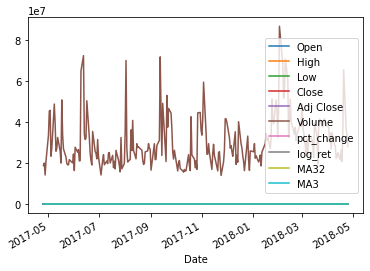

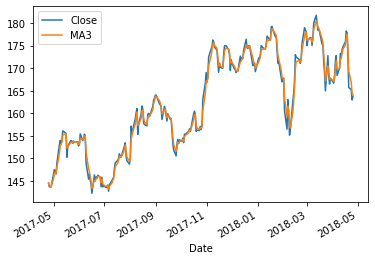

In [47]:
alpha=0.6
appl['MA3']=appl['Close'].ewm(alpha=alpha).mean()
appl.plot()

appl[['Close', 'MA3']].plot()

##  1.4.3 Mevsimsellik

Mevsimsellik, bir zaman serisinde her yıl aynı dönemde tekrar eden hareketler olarak tanımlanabilir.
Zaman serilerinde mevsimsel düzeltme, gözlenen serinin mevsimsel dalgalanmalardan ve temel trendlerden arındırılması anlamına gelmektedir.

Örneklendirmek için Güneş lekesi veri setini incelenecek.
Buradaki amaç aylık verileri yıllık olarak görebilmek.

In [48]:
sun =pd.read_csv('sunspots_month.csv')
sun.Year =pd.to_datetime(sun.Year,
format='%Y-%m-%d')
sun.set_index('Year', inplace=True)

Veri seti tanıtılıp tarihlerin ayrışması gereken biçim belirtildi.
Veri setimizdeki hangi sütunun dizin olduğu belirtildi.



Verileri yıllık frekanslarla yeniden örneklendiriyoruz.

In [49]:
sun_year =sun.resample('Y').mean()

Hızlı Fourier dönüşümünü (Hızlı Fourier dönüşümünü) sciyp'den import edildi.

In [50]:
from scipy import fftpack

Sinyalin FFT'sini ve normalizasyon sabiti hesaplandı.

Y=fftpack.fft(sun_year['Value'])
n=int(len(Y)/2)

Sinyaldeki frekansları tutacak bir dizi oluşturuldu ve dönem ters frekanstır.
Bu bilgilerle dönem elde edildi


freq=np.array(range(n))/(2*n)
period=1./freq


Sinyali güç spekturumu hesaplandı.


power=abs(Y[1:n])**2



Güneş lekeleri verilerinin güç spekturum analizi. Maksimum değerin yaklaşık her 11 yılda bir gerçekleştiği görüldü.

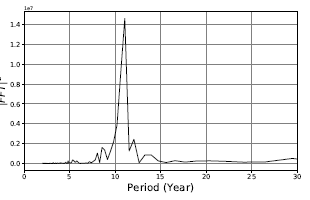

In [51]:
Image("sunevery11year.png")

ÖZET: Bu bölümde zaman serisi verileriyle uğraşmanın bazı önemli yönlerini ele aldık. Zaman bileşeninden dolayı zaman serilerinin diğer veri kümelerinden farklı olduğunu gördük. Apple Inc' in fiyatlarını, 1700'lerin ortalarından bu yana güneş lekelerinin faaliyetini inceledik. PANDAS sayesinde bu çeşitli veri setleriyle başa çıkabildik. Çeşitli yöntemlerle istediğimiz sonuçları elde ettik.